In [96]:
import pandas as pd

In [97]:
df = pd.read_csv("./Dataset/admission_prediction_dataset.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [98]:
df.shape

(500, 9)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [100]:
df.duplicated().sum()

0

In [101]:
from sklearn.preprocessing import MinMaxScaler # MinMax Scaling is used when the upper bound values are known.
minmax_scaler = MinMaxScaler()

In [102]:
df.drop(columns=['Serial No.'], inplace=True)

In [103]:
# Input and Output labels
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [104]:
print(X.shape, y.shape)

(500, 7) (500,)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [106]:
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [107]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [108]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))

C:\Users\12368\OneDrive\Desktop\DeepLearning\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [111]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3830 - val_loss: 0.3160
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3023 - val_loss: 0.2419
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2260 - val_loss: 0.1745
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1579 - val_loss: 0.1169
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1010 - val_loss: 0.0730
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0599 - val_loss: 0.0471
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - val_loss: 0.0364
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0294 - val_loss: 0.0338
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0272 - val_loss: 0.0330
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0263 - val_loss: 0.0318
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251 - val_loss: 0.0303
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

In [112]:
y_pred = model.predict(X_test_scaled)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.6249105 ],
       [0.8082687 ],
       [0.5394592 ],
       [0.6938469 ],
       [0.812469  ],
       [0.8209289 ],
       [0.6339256 ],
       [0.6998997 ],
       [0.5076757 ],
       [0.7178416 ],
       [0.87096065],
       [0.5905682 ],
       [0.84546787],
       [0.82315266],
       [0.65467983],
       [0.9283984 ],
       [0.78867   ],
       [0.75523126],
       [0.9346416 ],
       [0.6243261 ],
       [0.68101346],
       [0.65786964],
       [0.80379236],
       [0.61085206],
       [0.6463091 ],
       [0.8364189 ],
       [0.91152984],
       [0.63779646],
       [0.5697298 ],
       [0.7522214 ],
       [0.61913615],
       [0.59275866],
       [0.72938794],
       [0.5491798 ],
       [0.5830736 ],
       [0.65267295],
       [0.656164  ],
       [0.8922502 ],
       [0.683215  ],
       [0.64319086],
       [0.57406855],
       [0.75215507],
       [0.6479449 ],
       [0.9347512 ],
       [0.63473487],
       [0.5839616 ],
       [0.7717333 ],
       [0.665

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766821393881253

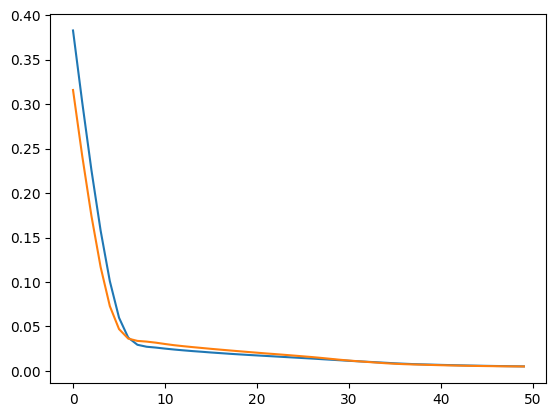

In [134]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])